In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

In [2]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
data.shape

(506, 13)

In [4]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
target.shape

(506,)

In [6]:
X = data

In [8]:
Y = target.reshape((506, 1))

# Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [11]:
X_train.shape

(379, 13)

In [12]:
X_test.shape

(127, 13)

# Standard scaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train.mean()

69.8686786502943

In [15]:
X_train.std()

144.73648530555536

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.mean()

1.545253788039268e-15

In [18]:
X_train.std()

1.0000000000000004

# Entrainement du model

In [19]:
def erreur(X, Y, params):

  info = {}

  M = np.dot(X, params['W'])

  P = M + params['B']

  L = np.mean((Y-P) ** 2)

  info['M'] = M
  info['P'] = P

  info['X'] = X
  info['Y'] = Y



  return L, info

In [20]:
def gradient(info, params):
  grads = {}

  dL_dP = -2 * (info['Y'] - info['P']) # (4, 1)

  dP_dM = 1

  dM_dW = info['X'].T #(3, 4)


  dL_dW = np.dot(dM_dW, dL_dP) * dP_dM   # (4, 1) * (3, 4)  # (3, 4) (4, 1)
  grads['W'] = dL_dW


  dP_dB = 1

  dL_dB = dL_dP * dP_dB #(4, 1) * 1

  dL_dB = np.sum(dL_dB)

  grads['B'] = dL_dB

  return grads

In [25]:
def train(X, Y, epoch, learning_rate):

  # weights initialization
  np.random.seed(42)
  n_features  = X.shape[1]
  params = {}
  params['W'] = np.random.randn(n_features, 1)
  params['B'] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):

    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} .............. loss : {loss}')

    #backward

    grads = gradient(info, params)


    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

In [22]:
X_train.shape

(379, 13)

In [23]:
np.random.randn(13, 1)

array([[-1.51781895],
       [-0.456218  ],
       [-1.11038771],
       [-0.11869902],
       [ 0.44586959],
       [ 0.27783521],
       [ 0.50486346],
       [ 0.0649392 ],
       [ 0.16978889],
       [-0.28172647],
       [ 0.48045923],
       [-1.32078922],
       [ 2.73406587]])

In [27]:
params, errors = train(X_train, y_train, epoch=50, learning_rate=0.0001)

Epoch 1 .............. loss : 712.1743316753176
Epoch 2 .............. loss : 576.9266828543414
Epoch 3 .............. loss : 485.858491899185
Epoch 4 .............. loss : 415.2086742559719
Epoch 5 .............. loss : 356.9632229723388
Epoch 6 .............. loss : 307.84342137397
Epoch 7 .............. loss : 266.08549083943615
Epoch 8 .............. loss : 230.48512859031536
Epoch 9 .............. loss : 200.10246942244535
Epoch 10 .............. loss : 174.16135658526716
Epoch 11 .............. loss : 152.00725038460388
Epoch 12 .............. loss : 133.0840641810185
Epoch 13 .............. loss : 116.91811788815627
Epoch 14 .............. loss : 103.1055392228527
Epoch 15 .............. loss : 91.30184176600252
Epoch 16 .............. loss : 81.21313594214138
Epoch 17 .............. loss : 72.58866623374146
Epoch 18 .............. loss : 65.21445904094307
Epoch 19 .............. loss : 58.90791093686188
Epoch 20 .............. loss : 53.51317628743457
Epoch 21 .............. lo

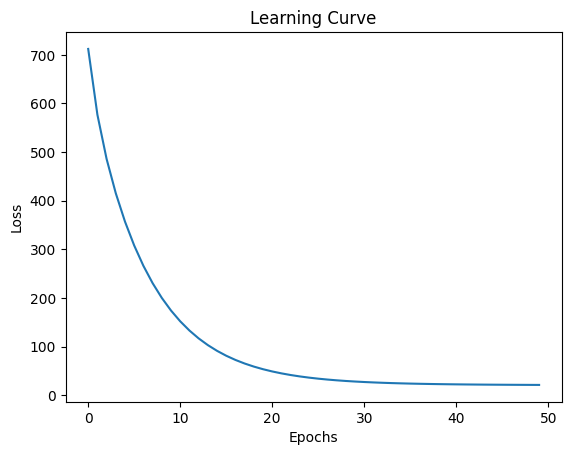

In [28]:
import matplotlib.pyplot as plt
plt.plot(list(range(50)), errors)
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

# Evaluation sur les données de test

In [29]:
def predict(X, params):

  M = np.dot(X, params['W'])

  P = M + params['B']

  return P

In [33]:
def mse(y, pred): # mean squared error
  return np.mean( (y-pred)** 2)

def rmse(y, pred):
  return np.sqrt(np.mean( (y-pred)** 2))

def mae(y, pred):
  return np.mean(np.abs(y - pred))

In [34]:
preds = predict(X_test, params)
score_rmse = rmse(y_test, preds)
score_mae = mae(y_test, preds)
print("rmse : ", score_rmse)
print("mae : ", score_mae)

rmse :  5.789353683592818
mae :  3.767565256108071


In [35]:
np.sqrt(21.20)

4.604345773288535

In [ ]:
rmse _train = 4.6, rmse_test = 5.78 # overfitting

In [36]:
params

{'W': array([[-0.61301264],
        [ 0.3831569 ],
        [-0.33512567],
        [ 0.75907099],
        [-0.99290619],
        [ 3.1112321 ],
        [ 0.24618677],
        [-1.28640179],
        [ 0.15130188],
        [-0.18963709],
        [-2.1719948 ],
        [ 0.74003657],
        [-3.34785879]]),
 'B': array([[22.13243641]])}

In [ ]:
RM       average number of rooms per dwelling

# Comparaison avec sklearn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


preds = model.predict(X_test)
score_rmse = rmse(y_test, preds)
score_mae = mae(y_test, preds)
print("rmse : ", score_rmse)
print("mae : ", score_mae)

rmse :  5.4573111595640516
mae :  3.6683301481357136


In [42]:
X_train[5].shape

(13,)

In [46]:
params["W"][5]

array([3.1112321])

In [49]:
params["B"].item()

22.132436414328804

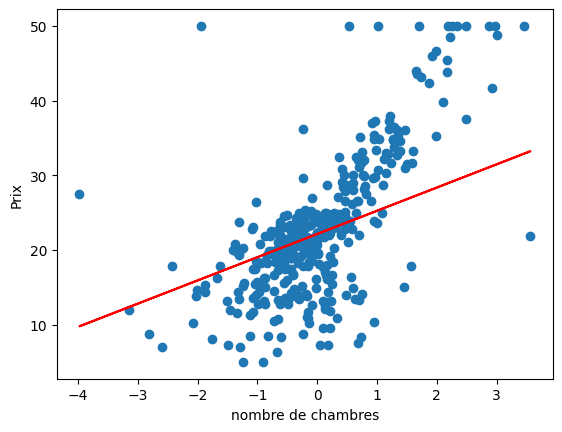

In [52]:
plt.scatter(X_train[:, 5], y_train)
plt.plot(X_train[:, 5], params["W"][5] * X_train[:, 5] + params["B"].item(), c="r")
plt.xlabel("nombre de chambres")
plt.ylabel('Prix')
plt.show()